In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Epoch 1/50


C:\Users\vijay\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.4170 - loss: 0.8372 - val_accuracy: 0.5208 - val_loss: 0.6862
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5126 - loss: 0.6986 - val_accuracy: 0.7083 - val_loss: 0.6425
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6813 - loss: 0.6095 - val_accuracy: 0.7500 - val_loss: 0.6160
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7471 - loss: 0.5482 - val_accuracy: 0.7708 - val_loss: 0.5935
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7017 - loss: 0.5777 - val_accuracy: 0.7500 - val_loss: 0.5709
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8100 - loss: 0.5021 - val_accuracy: 0.7500 - val_loss: 0.5516
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7375 - loss: 0.5316 - val_accuracy: 0.7292 - val_loss: 0.5365
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8200 - loss: 0.4730 - val_accuracy: 0.7708 - val_loss: 0.

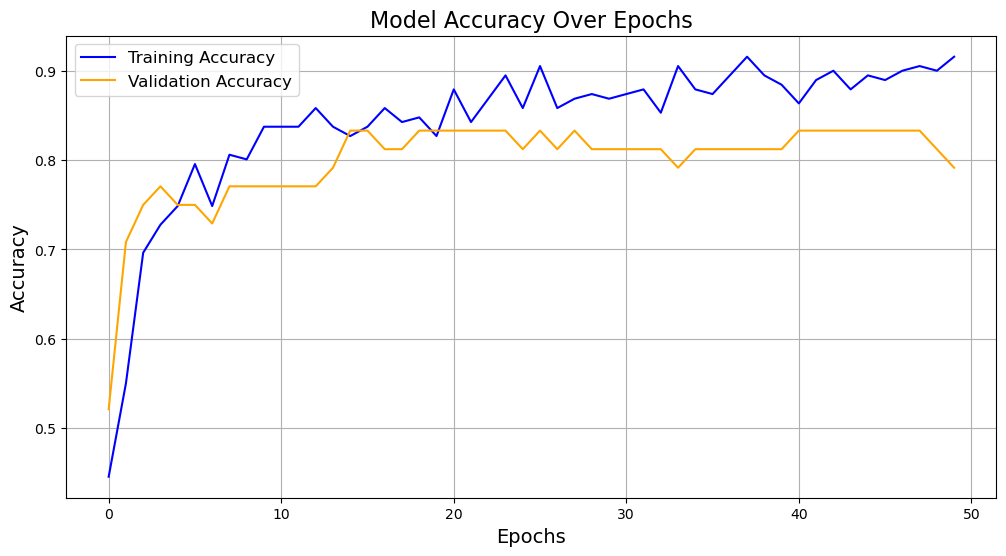

Model saved as 'heart_failure_prediction_model.h5'


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Load and Inspect the Dataset
DATA_PATH = "heart_failure_clinical_records_dataset.csv"
data = pd.read_csv(DATA_PATH)

# Step 2: Data Preprocessing
# Separate features and target variable
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Build the Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

# Step 6: Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 7: Visualize the Training Process
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(visible=True)
plt.show()

# Step 8: Save the Model (Optional)
model.save("heart_failure_prediction_model.h5")
print("Model saved as 'heart_failure_prediction_model.h5'")
